Задача
Проанализируйте A/B-тест:

    1.Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
    2.Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
    3.Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
    4.Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.
    5.Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.
    6.Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
    7.Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
    8.Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
    9.Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
    10.Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.
    11.Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
    12.Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.
    13.Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
    14.Примите решение по результатам теста и объясните его. Варианты решений:
    
        1. Остановить тест, зафиксировать победу одной из групп. 
        2. Остановить тест, зафиксировать отсутствие различий между группами. 
        3. Продолжить тест.

# Часть 1. Приоритизация гипотез. 

### Задача:
    *Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
    *Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
    *Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt 
import warnings
warnings.filterwarnings("ignore")

In [2]:
try:
    df = pd.read_csv('D:/backUp/hypothesis.csv')
except:
    df = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
df.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
df.columns = df.columns.str.lower()

Применим фреймворк ICE and RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [6]:
df['ice_metric'] = df['impact']*df['confidence'] / df['efforts']
df['rice_metric'] = df['ice_metric']*df['reach']

In [7]:
df.sort_values(by='ice_metric', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice_metric,rice_metric
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


In [8]:
df.sort_values(by='rice_metric', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice_metric,rice_metric
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


### После применения ICE  мы приоритизировали гипотезы 8,0,7. Потом добавили вляние охвата с помощья фрэймвока RICE и лидером стала гипотеза 7:


In [9]:
df['hypothesis'][7]

'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок'

### Так произошло, потому что охват гипотезы 7 в два раза больше охвата гипотезы 0 и в 10 раз больше охвата гипотезы 8 

# Часть 2. Анализ A/B-теста

In [10]:
try:
    visitors = pd.read_csv('D:/backUp/visitors.csv')
    orders = pd.read_csv('D:/backUp//orders.csv')
except:
    visitors = pd.read_csv('/datasets/visitors.csv')
    orders = pd.read_csv('/datasets/orders.csv')

In [11]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [15]:
orders.columns = orders.columns.str.lower()

In [16]:
visitors['date'] = visitors['date'].map(lambda x : pd.to_datetime(x))

In [17]:
orders['date'] = orders['date'].map(lambda x : pd.to_datetime(x))

In [18]:
visitors.duplicated().mean()

0.0

In [19]:
orders.duplicated().mean()

0.0

In [20]:
users_for_both_groups = orders[np.logical_and(orders['group'] == 'A', orders[orders['group'] == 'A']['visitorid']
                                              .isin(orders[orders['group'] == 'B']['visitorid']))]['visitorid']

In [21]:
users_for_both_groups.count()

89

In [22]:
orders['visitorid'].nunique()

1031

In [23]:
users_for_both_groups.count() / orders['visitorid'].nunique()

0.0863239573229874

Данные готовы к анализу. Пропусков и дубликатов нет. Есть пользователи, которые попали в обе группы. Я бы поинтересовался у того, кто собирал данные, допускается ли по техническому заданию при сборе данных для анализа, попадание в обе группы. Можно просто удалить этих пользователей из обеих групп, в этом случае потеряется почти 9% данных.

## 1. Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

In [24]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates()

In [25]:
#dates_groups

In [26]:
# cобираем агрегированные кумулятивные по дням данные о заказах
cumulative_revenue = ( dates_groups.apply(lambda x: 
     orders[np.logical_and(orders['date'] <= x['date'], x['group'] == orders['group'])]
     .agg({'date':'max', 
      'revenue':'sum', 
      'group':'max', 
      'transactionid':'nunique', 
      'visitorid':'nunique'}), axis=1)
      .sort_values(by=['date','group'],ascending=True) )

In [27]:
cumulative_revenue

,date,revenue,group,transactionid,visitorid
55,2019-08-01,148579,A,24,20
66,2019-08-01,101217,B,21,20
175,2019-08-02,242401,A,44,38
173,2019-08-02,266748,B,45,43
291,2019-08-03,354874,A,68,62
...,...,...,...,...,...
496,2019-08-29,5559398,B,596,544
730,2019-08-30,4022970,A,545,493
690,2019-08-30,5774631,B,620,567
958,2019-08-31,4084803,A,557,503


In [28]:
cumulative_revenue_group_A = cumulative_revenue[cumulative_revenue['group'] == 'A'][['date', 'revenue']]

In [29]:
cumulative_revenue_group_B = cumulative_revenue[cumulative_revenue['group'] == 'B'][['date', 'revenue']]

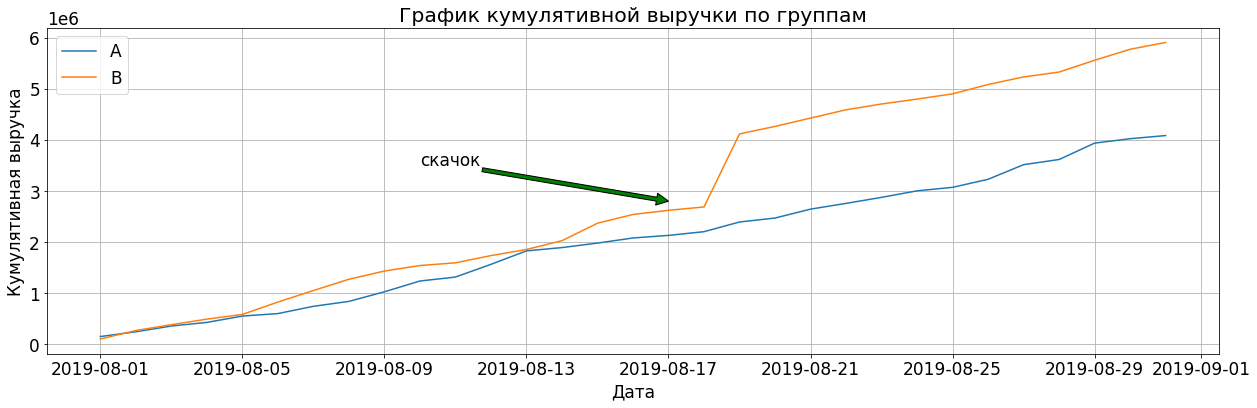

In [30]:
plt.rcParams["figure.figsize"] = (21,6)
plt.rcParams.update({'font.size': 17})
plt.plot(cumulative_revenue_group_A['date'], cumulative_revenue_group_A['revenue'], label='A')
plt.plot(cumulative_revenue_group_B['date'], cumulative_revenue_group_B['revenue'], label='B')
plt.annotate('скачок', xy=(dt.datetime(2019, 8, 17), 2800000), xytext=(dt.datetime(2019, 8, 10), 3500000),
            arrowprops=dict(facecolor='g'))
plt.title(label='График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.grid()
plt.legend()

In [31]:
# Вернет фигуры для следующих график к размерам по умолчанию
# plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

### Выручка растет - это хорошо. Резкий всплеск выручки для группы В говорит о том, что в данных могут быть выбросы

## 2. Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

In [32]:
cumulative_revenue_group_A = ( cumulative_revenue[cumulative_revenue['group'] == 'A']
[['date', 'revenue', 'transactionid']] )
cumulative_revenue_group_B = ( cumulative_revenue[cumulative_revenue['group'] == 'B']
[['date', 'revenue', 'transactionid']] )

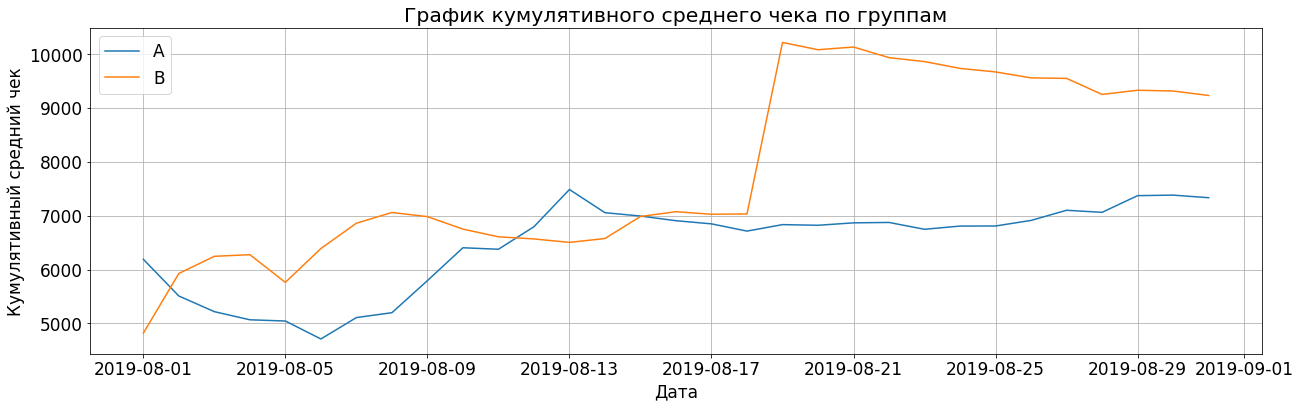

In [33]:
plt.plot( cumulative_revenue_group_A['date'], 
         cumulative_revenue_group_A['revenue'] / cumulative_revenue_group_A['transactionid'] , label='A'
)
plt.plot( cumulative_revenue_group_B['date'], 
         cumulative_revenue_group_B['revenue'] / cumulative_revenue_group_B['transactionid'] , label='B'
)
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.grid()
plt.legend()

### Для группы А средний чек зафиксировался в районе 7000, группы В показала странный скачок в середине графика, хотя до этого была примерно на отметке группы А, возможно влияние выбросов

## 3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

In [34]:
# слепляем таблицы с данными групп В и А в одну 
cumulative_revenue_merged = cumulative_revenue_group_A.merge(cumulative_revenue_group_B, 
                                                             on='date', how='left', suffixes=['A','B'])

In [35]:
#cumulative_revenue_merged.head()

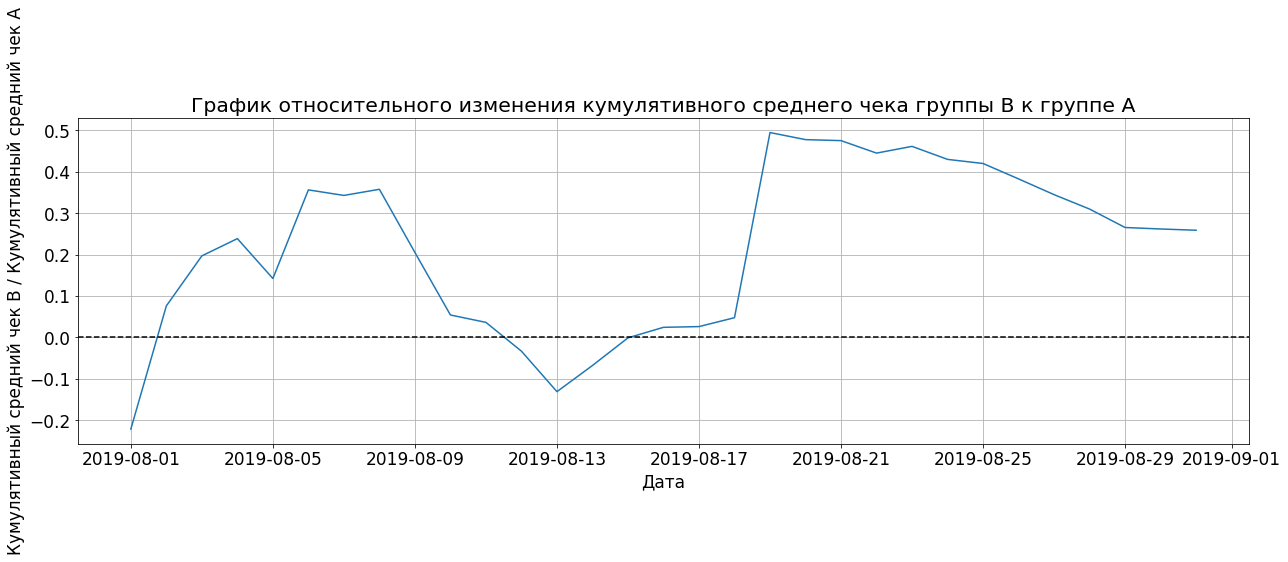

In [36]:
plt.plot(cumulative_revenue_merged['date'],
         (cumulative_revenue_merged['revenueB'] / cumulative_revenue_merged['transactionidB']) / 
         (cumulative_revenue_merged['revenueA'] / cumulative_revenue_merged['transactionidA']) - 1 )
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек В / Кумулятивный средний чек А')
plt.grid()

### Заметно влияние выброса по центру, без него линия была бы около 0 

## 4. Построим график кумулятивной конверсии по группам. Сделаем выводы и предположения.

In [37]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
cumulative_visitors = dates_groups.apply(lambda x:
       visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].
                                                agg({'date':'max',
                                                    'group':'max',
                                                    'visitors':'sum'}), axis=1).sort_values(by=['date','group'])

In [38]:
#cumulative_visitors

In [39]:
# прикручиваем таблицу с кумулятивными данными о посетителях к таблице с куммулятивными данными о заказах
cumulative_omni = cumulative_revenue.merge(cumulative_visitors, on=['date','group'], how='left')

In [40]:
#cumulative_omni.head()

In [41]:
cumulative_omni_A = cumulative_omni[cumulative_omni['group'] == 'A'][['date','transactionid','visitors']]
cumulative_omni_B = cumulative_omni[cumulative_omni['group'] == 'B'][['date','transactionid','visitors']]

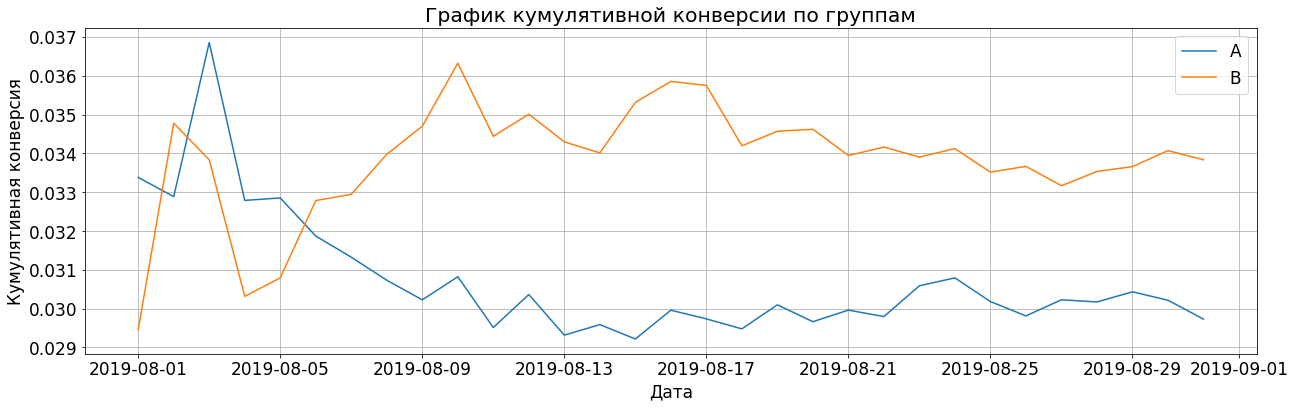

In [42]:
plt.plot(cumulative_omni_A['date'], cumulative_omni_A['transactionid'] / cumulative_omni_A['visitors'],label='A')
plt.plot(cumulative_omni_B['date'], cumulative_omni_B['transactionid'] / cumulative_omni_B['visitors'],label='B')
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')
plt.grid()
plt.legend()

### Конверсия группы В выше конверсии группы А 

## 5. Построим график относительного изменения кумулятивной конверсии группы B к группе A. Сделаем выводы и предположения.

In [43]:
# слепляем таблицы с данными групп В и А в одну 
cumulative_omni_merged = cumulative_omni_A.merge(cumulative_omni_B, on='date', how='left', suffixes=['A','B'])

In [44]:
cumulative_omni_merged.head(1)

,date,transactionidA,visitorsA,transactionidB,visitorsB
0,2019-08-01,24,719,21,713


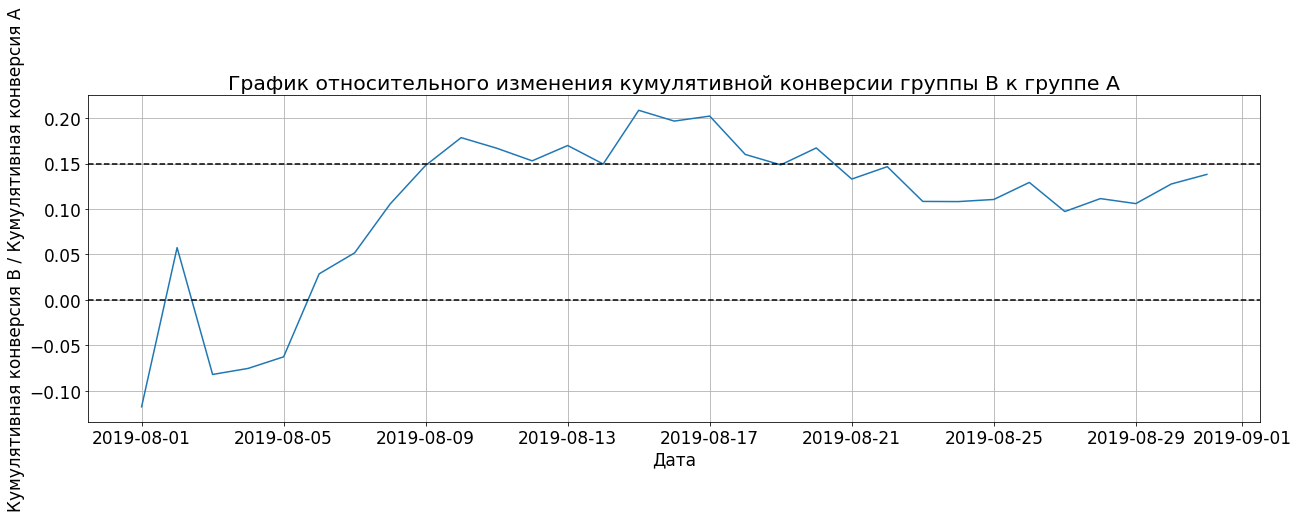

In [45]:
plt.plot(cumulative_omni_merged['date'],
         (cumulative_omni_merged['transactionidB'] / cumulative_omni_merged['visitorsB']) /
         (cumulative_omni_merged['transactionidA'] / cumulative_omni_merged['visitorsA']) -1 )
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия В / Кумулятивная конверсия А')
plt.grid()

### Конверсия группы В почти на 15% выше конверсии группы А 

## 6. Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

In [46]:
# агрегируем данные по заказам на уникального посетителя
orders_by_user = orders.groupby('visitorid',as_index=False).agg({'transactionid':'nunique'})

In [47]:
x_values = pd.Series(range(0,len(orders_by_user['visitorid'])))

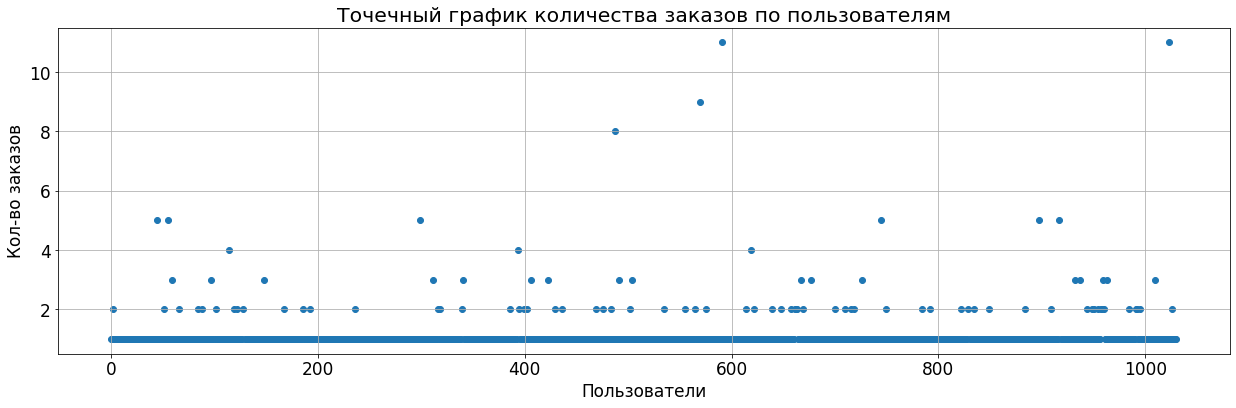

In [48]:
plt.scatter(x_values, orders_by_user['transactionid'])
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Кол-во заказов')
plt.grid()

### Один, два заказа на пользователя - обычное дело

## 7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [49]:
np.percentile(orders_by_user['transactionid'],[95,99])

array([2., 4.])

### Будем считать тех кто совершил больше 2 заказов, аномальными пользователями, отсеиваем не больше 5% выборки

## 8. Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

In [50]:
x_values = pd.Series(range(0,len(orders['revenue'])))

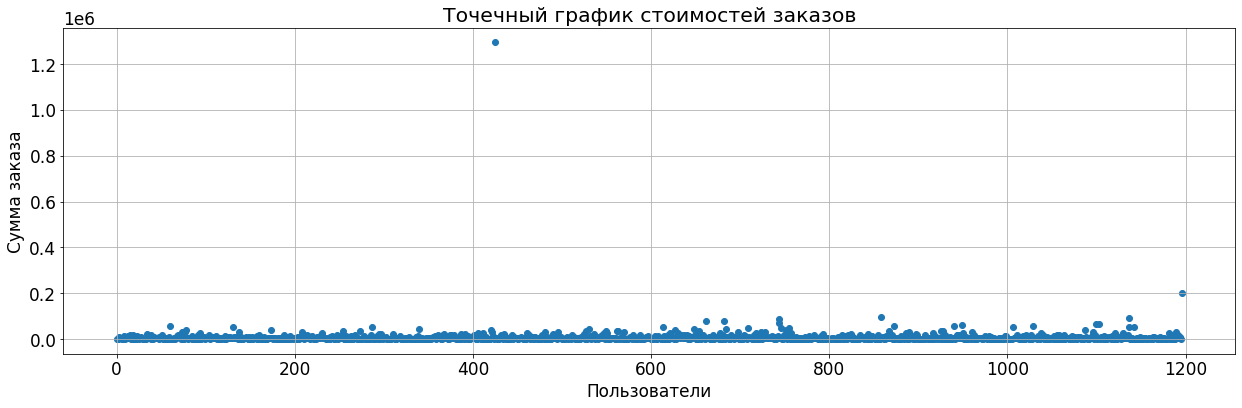

In [51]:
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Сумма заказа')
plt.grid()

### На графике замеины очень дорогие заказы

## 9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [52]:
np.percentile(orders['revenue'],[95,99])

array([28000. , 58233.2])

### Выберем границей 30000 за заказ, отсеим от 1 до 5 процентов выборки 

## 10. Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположения.

In [53]:
orders.head(1)

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B


In [54]:
# агрегируем данные по заказам на уникального посетителя для группы А
orders_per_user_A = orders[orders['group'] == 'A'].groupby('visitorid',as_index=False).agg({'transactionid':'nunique'})

In [55]:
orders_per_user_A.columns = ['visitor_id','orders']

In [56]:
visitors.head(1)

,date,group,visitors
0,2019-08-01,A,719


In [57]:
# создаем массив с нулями длиной = суммарное кол-во посетителей группы А минус кол-во посетителей сделваших заказ
pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(orders_per_user_A['orders'])))

0        0
1        0
2        0
3        0
4        0
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Length: 18233, dtype: int64

In [58]:
# сцепляем данные по заказам на уникального посетителя для группы А с массивом нулей
sample_A = pd.concat(
    [orders_per_user_A['orders'],
           pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum()
                                        - len(orders_per_user_A['orders'])), name='orders')], axis=0)

In [59]:
#sample_A

In [60]:
orders_per_user_B = orders[orders['group'] == 'B'].groupby('visitorid',as_index=False).agg({'transactionid':'nunique'})
orders_per_user_B.columns = ['visitor_id','orders']

In [61]:
# повторяем процедуру для группы В 
sample_B = pd.concat(
[orders_per_user_B['orders'],
pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - len(orders_per_user_B)))],
axis=0)

In [62]:
#sample_B

In [63]:
# применяем тест МАнна-Уитни для двух массивов групп А и В 
stats.mannwhitneyu(sample_A, sample_B)

MannwhitneyuResult(statistic=176473106.0, pvalue=0.016792355056752608)

In [64]:
sample_B.mean() / sample_A.mean() - 1 

0.13807884655320146

### p-value меньше 0.01 значит отвергаем нулевую гипотезу о том, что статистически значимых различий в конверсиях двух групп нет. Склоняемся к альтернативной гипотезе, конверсии двух групп статистически различны: конверсия В больше конверсии А на 13% 

<div class="alert alert-block alert-warning">
    

__Комментарий от ревьюера №1 (нужно доделать)__

Как это p-value меньше 0.01?
</div>

In [81]:
stats.mannwhitneyu(sample_A, sample_B)[1] < 0.01

False

## 11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

In [66]:
# применяем тест МАнна-Уитни для двух массивов групп А и В с данными о сумме заказа
stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'],orders[orders['group'] == 'B']['revenue'])

MannwhitneyuResult(statistic=176175.0, pvalue=0.7292909855432458)

In [67]:
orders[orders['group'] == 'B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean() -1

0.2587136699126005

### Хотя средний чек группы В на 25% больше среднего чека группы А, тест показал, что статистически значимых различий двух выборок нет, p-value > 0.05

## 12. Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем выводы и предположения.

In [68]:
orders_by_user = orders.groupby('visitorid',as_index=False).agg({'transactionid':'nunique'})

In [69]:
# массив с id пользователей с аномальным кол-вом заказов
users_anomal_count_orders = orders_by_user[orders_by_user['transactionid'] > 2]['visitorid']

In [70]:
# массив с id пользователей с аномальными чеками
users_anomal_revenue = orders[orders['revenue'] > 30000]['visitorid']

In [71]:
# объединяем два массив, убираем повторяющиеся id 
users_anomal_omni = pd.concat([users_anomal_count_orders, users_anomal_revenue]).drop_duplicates()

In [72]:
#users_anomal_omni

In [73]:
# отсекаем аномальных пользователей
orders_per_user_A_filtered = orders_per_user_A[np.logical_not(orders_per_user_A['visitor_id'].isin(users_anomal_omni))]

In [74]:
# сцепляем данные по заказам на уникального посетителя для группы А без аномальных юзеров с массивом нулей
sample_A_filtered = pd.concat(
[orders_per_user_A_filtered['orders'],
 pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() -
                              len(orders_per_user_A['orders'])))
    
])

In [75]:
orders_per_user_B_filtered = orders_per_user_B[np.logical_not(orders_per_user_B['visitor_id'].isin(users_anomal_omni))]

In [76]:
# то же самое для группы В 
sample_B_filtered = pd.concat(
[orders_per_user_B_filtered['orders'],
 pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() -
                              len(orders_per_user_B['orders'])))
    
])

In [77]:
# тест Мана-Уитни для двух групп 
stats.mannwhitneyu(sample_A_filtered, sample_B_filtered)

MannwhitneyuResult(statistic=175492056.5, pvalue=0.012460007662636382)

In [78]:
sample_B_filtered.mean() / sample_A_filtered.mean() -1 

0.17449303944355377

### Отвергаем нулевую гипотезу от отсутствии различий в двух выборках,  отфильтрованные данные показывают еще большую разницу в конверсии двух групп 

## 13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

In [79]:
stats.mannwhitneyu(
orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorid']
                                                              .isin(users_anomal_omni)))]['revenue'],
    orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorid']
                                                                  .isin(users_anomal_omni)))]['revenue']
)

MannwhitneyuResult(statistic=128667.5, pvalue=0.734091822489681)

In [80]:
(orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorid']
                                                              .isin(users_anomal_omni)))]['revenue'].mean() / 
    orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorid']
                                                                  .isin(users_anomal_omni)))]['revenue'].mean() - 1 )

0.026387358042055276

### p-value > 0.05, показывает , что статистически значимых различий двух выборок нет. Очищенные данные, показывают, что средний чек группы А больше среднего чека группы В на 2.6%. Грязные данные показывали, что чек В превышает А на 25%. Заметно влияние аномально больших заказов

# Вывод:

### Предлагаю остановить тест, группа В показала значительное превосходство в конверсии (> 15%), средний чек двух групп соизмерим 

Для анализа были предоставлены 2 датасета: с кол-вом посетителей по дням и данные с заказами. В результате обработки данных было выявлено, что в данных отсутствуют пропуски и дубликаты. Также обнаружено, что при разбивке по группам для тестирования гипотез есть пользователи, которые попали в обе группы. 

Были построены графики:
    * кумулятивной выручки по группам
    * кумулятивного среднего чека по группам
    * относительного изменения кумулятивного среднего чека группы B к группе A
    * кумулятивной конверсии по группам
    * относительного изменения кумулятивной конверсии группы B к группе A
    * количества заказов по пользователям
    * стоимостей заказов

Определены границы выбросов по аномальным количествам заказов на пользователя и по сумме заказа

Проведены тесты Мана-Уитни до исключения выбросов из данных и после для двух групп по различии конверсии и среднего чека.

Тесты для сырых и обработанных данных показали схожие результаты. Статистически значимых различий в среднем чеке для двух групп нет. Конверсия группы В выше конверсии группы А на 13%.

Предлагаю завершить тест.

При статистической оценке конверсии по 'сырым' данным нулевая гипотеза: две выборки являются выборками одной генеральной совокупности. Альтернативная гипотеза: выборки принадлежат статистически различимым совокупностям.
p-value = 0.017 < 5% значит что с вероятностью 98.3% мы корректно отвергаем нулевую гипотезу и вероятностью 1.7% ошиблись . Склоняемся к альтернативной гипотезе, конверсии двух групп, посчитанные на основании двух выборок статистически различны: конверсия В больше конверсии А на 13%.
                    
Точечный график количества заказов на пользователя показал, что пользователи редко делают больше 2ух заказов. Посчитав тех кто совершил больше 2 заказов аномальными пользователями, отсеили не больше 5% выборки.
                    
Точечный график среднего чека определил аномальной границей 30000 за заказ, отсеив от 1 до 5 процентов выборки.
                    
Очистив данные от аномальных пользлвателей, провели повторный тест Мана-Уитни, который выдал значение p-value= 0.012, что подтвердило результаты первого теста. Посчитанная конверсия В оказалась больше конверсии А на 17%.
                    
Для среднего чека нулевая гипотеза: выборка группы А и выборка группы В являются частями одной общей выборки. Альтернативная гипотеза: выборки принадлежат разным генеральным совокупностям. Для сырых данных: p-value= 0.73 . Для очищенных от аномальных пользователей данных: p-value= 0.73. В обоих случаях нет оснований отвергать нулевую гипотезу. Средний чек группы В больше группы А на 25% для сырых данных , средний чек группы А выше среднего чека группы В на 2.6% для очищенных данных.